# PORTFOLIO OPTIMISATION 

This project embarks on an incisive exploration and comparative examination of a broad spectrum of methods encompassing both traditional statistical models like Mean-Variance optimisation and cutting-edge artificial intelligence paradigms, specifically deep learning and reinforcement learning techniques. The end goal is to discover the most effective approach to optimizing a portfolio of financial assets, striking an optimal balance between maximising returns and minimising the inherent risk and volatility. In essence, this research seeks to unveil techniques that transform the science of portfolio management into an art, enabling unprecedented returns on investment while mitigating associated risks.

In [1]:
# import the necessary python libraries
import pandas as pd
import numpy as np
from datetime import datetime

# Visualisation Libraries
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Utility Scripts
from data_loader import get_closing_prices

**Obtaining the historical stock prices data for stocks in a portfolio**

In [2]:
# Tickers of the Stocks to examine within the portfolio
tickers = ['META','AMZN','AAPL', 'GOOG', 'NFLX', 'MSFT', 'TSLA']

# date range of the stocks
start_date = '2013-01-01'
todays_date = datetime.today().strftime('%Y-%m-%d')
# todays_date = '2020-03-16'
time_interval = 'daily'

# Create the data-source object and fetch the stocks data
df = get_closing_prices(tickers, start_date, todays_date, time_interval)

In [3]:
df.head()

META     AMZN       AAPL       GOOG       NFLX       MSFT  \
Date                                                                         
2013-01-02  28.000000  12.8655  19.608213  18.013729  13.144286  27.620001   
2013-01-03  27.770000  12.9240  19.360714  18.024191  13.798571  27.250000   
2013-01-04  28.760000  12.9575  18.821428  18.380356  13.711429  26.740000   
2013-01-07  29.420000  13.4230  18.710714  18.300158  14.171429  26.690001   
2013-01-08  29.059999  13.3190  18.761070  18.264042  13.880000  26.549999   

                TSLA  
Date                  
2013-01-02  2.357333  
2013-01-03  2.318000  
2013-01-04  2.293333  
2013-01-07  2.289333  
2013-01-08  2.245333

In [4]:
# Visualising the Stocks Data
fig = go.Figure()

# Add traces for each stock
for column in df.columns:
    fig.add_trace(go.Scatter(x=df.index, y=df[column], mode='lines', name=column))

# Add a title and labels
fig.update_layout(title='Historical Stock Prices',
                  xaxis=dict(title='Date'),
                  yaxis=dict(title='Closing Price (USD)'))

# Display the plot
fig.show()

**Calculating the Daily Returns**

In [6]:
returns = df.pct_change()
returns

META      AMZN      AAPL      GOOG      NFLX      MSFT  \
Date                                                                     
2013-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2013-01-03 -0.008214  0.004547 -0.012622  0.000581  0.049777 -0.013396   
2013-01-04  0.035650  0.002592 -0.027855  0.019760 -0.006315 -0.018716   
2013-01-07  0.022949  0.035925 -0.005882 -0.004363  0.033549 -0.001870   
2013-01-08 -0.012237 -0.007748  0.002691 -0.001974 -0.020565 -0.005245   
...              ...       ...       ...       ...       ...       ...   
2023-07-10  0.012288 -0.020419 -0.010856 -0.027218  0.008240 -0.015984   
2023-07-11  0.014247  0.012979 -0.002810  0.007187 -0.003396  0.001929   
2023-07-12  0.037044  0.015686  0.008986  0.016226  0.008723  0.014227   
2023-07-13  0.013157  0.026758  0.004057  0.043555  0.014255  0.016192   
2023-07-14 -0.014486  0.002829  0.000787  0.006969 -0.018806  0.007529   

                TSLA  
Date                  
2013-01-02       NaN  
2013-01-03 -0.016685  
2013-01-04 -0.010642  
2013-01-07 -0.001744  
2013-01-08 -0.019220  
...              ...  
2023-07-10 -0.017564  
2023-07-11  0.000668  
2023-07-12  0.008154  
2023-07-13  0.021729  
2023-07-14  0.012523  

[2651 rows x 7 columns]

In [6]:
# Create a figure
fig = go.Figure()

# Add traces for each stock
for column in returns.columns:
    fig.add_trace(go.Scatter(x=returns.index, y=returns[column], mode='lines', name=column))

# Add a title and labels
fig.update_layout(title='Daily Returns of the Portfolio',
                  xaxis=dict(title='Date'),
                  yaxis=dict(title='Daily Returns'))

# Display the plot
fig.show()


**Displaying the annualised Covariance Matrix**

In [7]:
cov_matrix_annual = returns.cov() * 252 #where 252 is the number of business days
cov_matrix_annual

META      AMZN      AAPL      GOOG      NFLX      MSFT      TSLA
META  0.149588  0.069010  0.053426  0.063333  0.074293  0.053551  0.069720
AMZN  0.069010  0.107105  0.047533  0.056708  0.073713  0.053062  0.069731
AAPL  0.053426  0.047533  0.082547  0.044833  0.043463  0.048478  0.061345
GOOG  0.063333  0.056708  0.044833  0.075396  0.055725  0.051510  0.056098
NFLX  0.074293  0.073713  0.043463  0.055725  0.223372  0.050448  0.087299
MSFT  0.053551  0.053062  0.048478  0.051510  0.050448  0.073411  0.057414
TSLA  0.069720  0.069731  0.061345  0.056098  0.087299  0.057414  0.327730

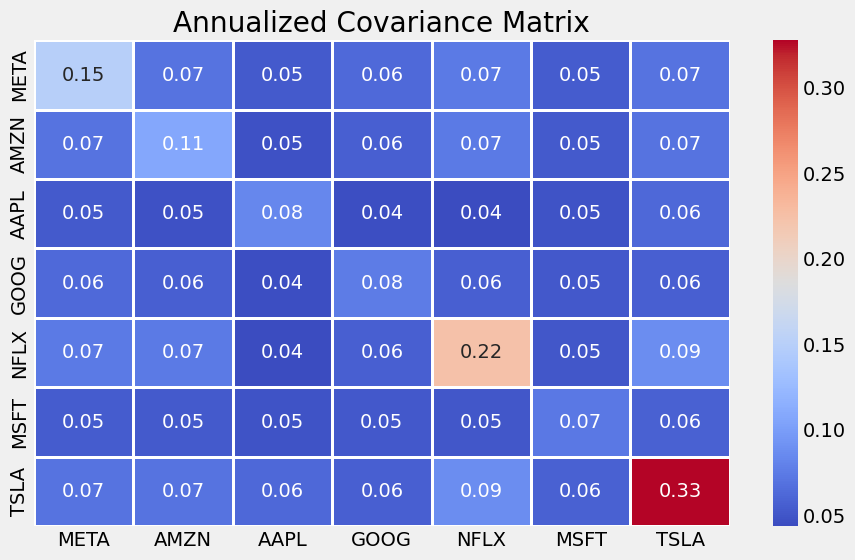

In [8]:
cov_matrix_annual = returns.cov() * 252

# Visualise the Annualised Covariance Matrix
plt.figure(figsize=(10, 6)) # You can adjust the size of your plot

# Creating the heatmap
sns.heatmap(cov_matrix_annual, annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)

plt.title("Annualized Covariance Matrix")
plt.show()

**Calculating the Variance of the Portfolio**

![Formula for Variance of a Portfolio](https://i.stack.imgur.com/U4B9I.png)

### 1. Equal Weight Investing

In [9]:
# initialising the weights of the assets in the portfolio 
# balanced weights (initiallialy all weighing the same)

weights = np.array([1/len(tickers) for t in tickers])
weights

array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
       0.14285714, 0.14285714])

In [10]:
# Calculating the variance of the Portfolio
port_variance = np.dot(weights.T, np.dot(cov_matrix_annual,weights))
port_variance

0.07184766305624726

**Calculating the Volatility of the Portfolio**

It can be done by taking the square root of the portfolio variance

In [11]:
# Calculating the volatility (std dev of the porfolio)
port_volitility = np.sqrt(port_variance)
port_volitility

0.26804414385740133

**Calculating the mean Portfolio Returns**

![Formula for the returns of a portfolio](https://pressbooks.pub/app/uploads/sites/4438/2022/02/work-14.15.png)

In [12]:
# Calculating the annual portfolio return
port_simple_return = np.sum(returns.mean() * weights) * 252 # we multiply it with 252 (no. of working days in a year) to annualise the returns
port_simple_return

0.3429309654263387

**Sharpe Ratio**

In [13]:
equal_weights_sr = port_simple_return/port_volitility

**Displaying the Return, Volatility and Variance of the equal-weighting Portfolio**

In [14]:
# Displaying the expected return, volatility and variance

print(f'Expected annual return: {port_simple_return*100 :.2f}%')
print(f'Annual volitility or risk: {port_volitility*100 :.2f}%')
print(f'Annual variance: {port_variance*100 :.2f}%')
print(f'Sharpe Ratio: {equal_weights_sr:.2f}%')

Expected annual return: 34.29%
Annual volitility or risk: 26.80%
Annual variance: 7.18%
Sharpe Ratio: 1.28%


In [15]:
comparison = {'Allocation Method':[], 'Return':[], 'Volatility':[], 'Sharpe Ratio':[], 'Weights':[]}

In [16]:
comparison['Allocation Method'].append('Equal Weighting')
comparison['Return'].append(round(port_simple_return*100,2))
comparison['Volatility'].append(round(port_volitility*100,2))
comparison['Sharpe Ratio'].append(equal_weights_sr)
comparison['Weights'].append(weights)

### 2. Mean-Variance Optimisation (MVO)

Introduced by Harry Markowitz, it's the basis for modern portfolio theory. It aims to create a portfolio that maximizes expected return for a given level of risk or minimizes risk for a given level of expected return.

The EfficientFrontier class in the PyPortfolioOpt library in Python is based on modern portfolio theory (MPT), specifically Markowitz's mean-variance optimisation model. The actual optimisation is done using a convex optimisation solver. PyPortfolioOpt uses the cvxpy library to define and solve the optimisation problem (Max Sharpe Ration). The result of the optimisation is the set of weights that satisfy the objective (max Sharpe Ratio).

In [17]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import plotting
from pypfopt.cla import CLA

In [18]:
# Optimising the Portfolio

# Expected returns
mu = expected_returns.mean_historical_return(df)

# Annalised covariance matrix of asset returns
S = risk_models.sample_cov(df)

# optimising for the highest Sharpe ratio
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights  = ef.clean_weights() # performs rounding
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

OrderedDict([('META', 0.0), ('AMZN', 0.0), ('AAPL', 0.10582), ('GOOG', 0.0), ('NFLX', 0.1921), ('MSFT', 0.43024), ('TSLA', 0.27184)])
Expected annual return: 37.5%
Annual volatility: 29.6%
Sharpe Ratio: 1.20


(0.37512759470197776, 0.29592604924063026, 1.2000552016737402)

In [19]:
comparison['Allocation Method'].append('Mean-Variance Optimimisation (MVO)')
comparison['Return'].append(round(ef.portfolio_performance()[0]*100,2))
comparison['Volatility'].append(round(ef.portfolio_performance()[1]*100,2))
comparison['Sharpe Ratio'].append(round(ef.portfolio_performance()[2],2))
comparison['Weights'].append(cleaned_weights)

**Visualising the Efficient Frontier**

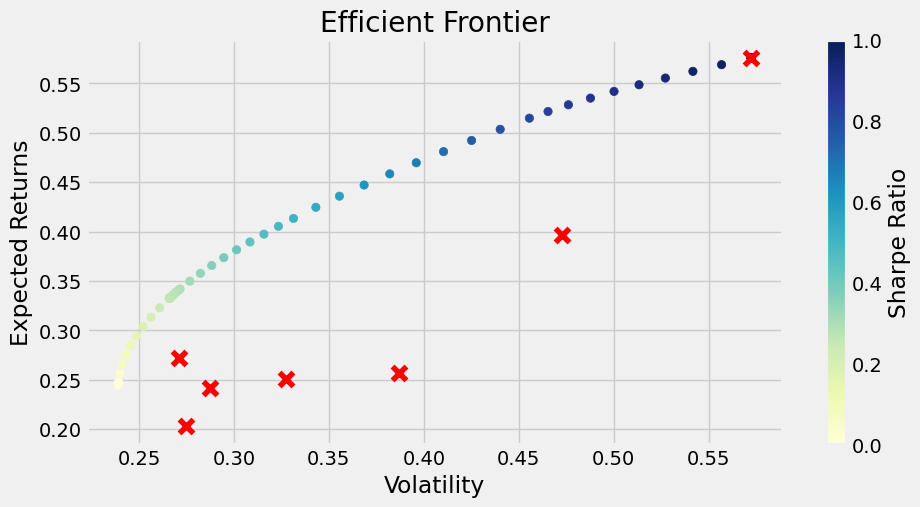

In [20]:
# Get the efficient frontier points
cla = CLA(mu, S)
(ret, vol, _) = cla.efficient_frontier()

# Plot the Efficient Frontier
plt.figure(figsize=(10, 5))
plt.scatter(vol, ret, c=(ret - min(ret))/(max(ret)-min(ret)), cmap='YlGnBu', marker='o')
plt.title('Efficient Frontier')
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')
plt.colorbar(label='Sharpe Ratio')

# Optional: plot the individual assets
individual_vol = np.sqrt(np.diag(S))
individual_ret = mu.values
plt.scatter(individual_vol, individual_ret, marker='x', color='red', s=100)

# Show the plot
plt.show()

### 3. Probabilistic Method: Monte Carlo Simulation

A probabilistic method where thousands or millions of random portfolio combinations are tested to identify optimal portfolios.

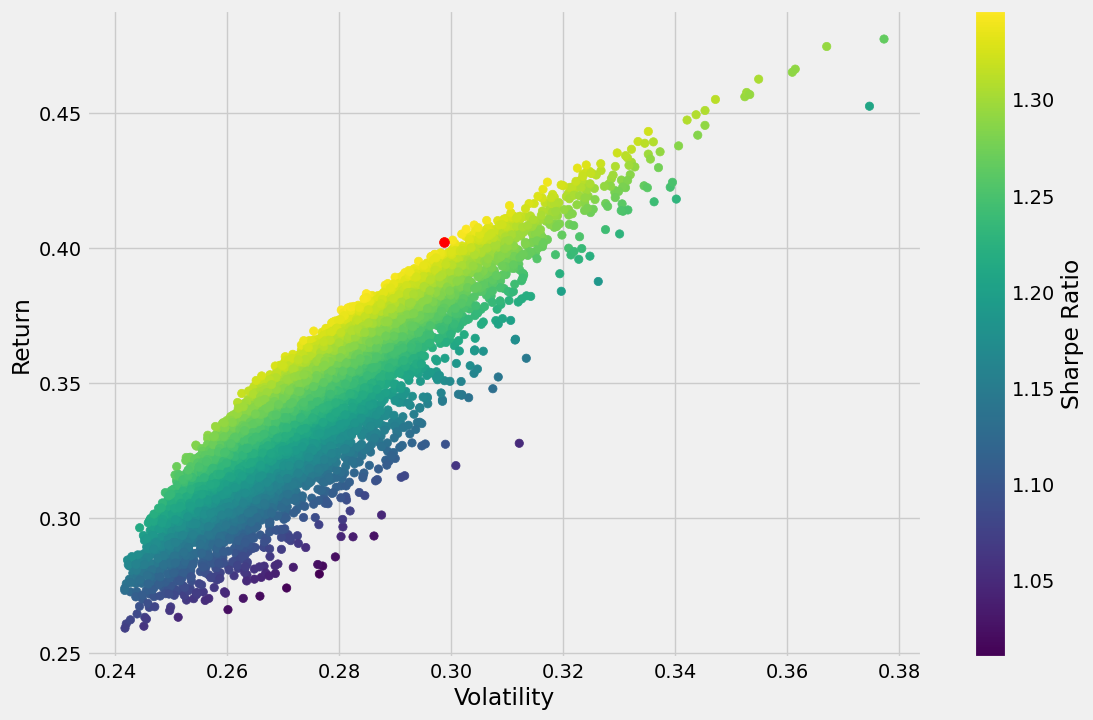

Expected annual return: 40.23%
Annual volitility or risk: 29.87%
Max Sharpe Ratio is 1.3467768453866293
Optimal weights are [0.08270744 0.0187761  0.2008993  0.00819569 0.23498508 0.19667618
 0.25776022]


In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Assume df is your DataFrame with historical stock prices.

# Calculate daily returns
returns = df.pct_change()

# Number of Portfolios to simulate
num_portfolios = 10000
all_weights = np.zeros((num_portfolios, len(df.columns)))
ret_arr = np.zeros(num_portfolios)
vol_arr = np.zeros(num_portfolios)
sharpe_arr = np.zeros(num_portfolios)

# Risk-free rate for Sharpe Ratio, you can adjust this
# risk_free_rate = 0.001
risk_free_rate = 0

for x in range(num_portfolios):

    # Weights
    weights = np.array(np.random.random(len(tickers)))
    weights = weights / np.sum(weights)
    
    # Save weights
    all_weights[x, :] = weights

    # Expected return
    ret_arr[x] = np.sum((returns.mean() * weights * 252))

    # Expected volatility
    vol_arr[x] = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))

    # Sharpe Ratio
    sharpe_arr[x] = (ret_arr[x] - risk_free_rate) / vol_arr[x]

# Plotting the data with a scatter plot
plt.figure(figsize=(12, 8))
plt.scatter(vol_arr, ret_arr, c=sharpe_arr, cmap='viridis')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Marking the point with the highest Sharpe Ratio
max_sr_ret = ret_arr[sharpe_arr.argmax()]
max_sr_vol = vol_arr[sharpe_arr.argmax()]
plt.scatter(max_sr_vol, max_sr_ret, c='red', s=50)  # Red dot

plt.show()

# Print weights for the portfolio with the highest Sharpe Ratio
print(f'Expected annual return: {max_sr_ret*100 :.2f}%')
print(f'Annual volitility or risk: {max_sr_vol*100 :.2f}%')
print(f"Max Sharpe Ratio is {sharpe_arr.max()}")
print(f"Optimal weights are {all_weights[sharpe_arr.argmax()]}")


In [22]:
comparison['Allocation Method'].append('Monte Carlo Simulation')
comparison['Return'].append(round(max_sr_ret*100,2))
comparison['Volatility'].append(round(max_sr_vol*100,2))
comparison['Sharpe Ratio'].append(sharpe_arr.max())
comparison['Weights'].append(all_weights[sharpe_arr.argmax()])

### 4. LSTM for Portfolio Optimisatio

In [10]:
from model import WeightSelectorLSTM
# to create a model, do: 
model = WeightSelectorLSTM()
# to get the optimized portfolio coefficients, do: 
coeffs = model.get_allocations(df)# where df is a DataFrame of closing prices of various assets

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: -0.0693
Epoch 2/100
1/1 [==============================] - 0s 293ms/step - loss: -0.0695
Epoch 3/100
1/1 [==============================] - 0s 350ms/step - loss: -0.0695
Epoch 4/100
1/1 [==============================] - 0s 332ms/step - loss: -0.0694
Epoch 5/100
1/1 [==============================] - 0s 335ms/step - loss: -0.0693
Epoch 6/100
1/1 [==============================] - 0s 352ms/step - loss: -0.0695
Epoch 7/100
1/1 [==============================] - 0s 327ms/step - loss: -0.0696
Epoch 8/100
1/1 [==============================] - 0s 364ms/step - loss: -0.0696
Epoch 9/100
1/1 [==============================] - 0s 301ms/step - loss: -0.0697
Epoch 10/100
1/1 [==============================] - 0s 347ms/step - loss: -0.0698
Epoch 11/100
1/1 [==============================] - 0s 353ms/step - loss: -0.0700
Epoch 12/100
1/1 [==============================] - 0s 334ms/step - loss: -0.0701
Epoch 13/100
1/1 [==========

In [11]:
# Calculating the annual portfolio return
port_lstm_return = np.sum(returns.mean() * coeffs) * 252 # we multiply it with 252 (no. of working days in a year) to annualise the returns
# Calculating the variance of the Portfolio
port_variance = np.dot(coeffs.T, np.dot(cov_matrix_annual,coeffs))
port_lstm_volitility = np.sqrt(port_variance)
lstm_sr = port_lstm_return/port_lstm_volitility

In [12]:
# Displaying the expected return, volatility and sharpe ratio

print(f'Expected annual return: {port_lstm_return*100 :.2f}%')
print(f'Annual volitility or risk: {port_lstm_volitility*100 :.2f}%')
print(f'Sharpe Ratio: {lstm_sr:.2f}%')


comparison['Allocation Method'].append('LSTM')
comparison['Return'].append(round(port_lstm_return*100,2))
comparison['Volatility'].append(round(port_lstm_volitility*100,2))
comparison['Sharpe Ratio'].append(lstm_sr)
comparison['Weights'].append(coeffs)

Expected annual return: 32.14%
Annual volitility or risk: 26.06%
Sharpe Ratio: 1.23%


NameError: name 'comparison' is not defined

**Displaying the Return, Volatility and Variance of the deep learning based Portfolio**

In [26]:
res = pd.DataFrame(comparison)
res

Allocation Method  Return  Volatility  Sharpe Ratio  \
0                     Equal Weighting   34.29       26.80      1.279382   
1  Mean-Variance Optimimisation (MVO)   37.51       29.59      1.200000   
2              Monte Carlo Simulation   40.23       29.87      1.346777   
3                                LSTM   32.07       26.12      1.227805   

                                             Weights  
0  [0.14285714285714285, 0.14285714285714285, 0.1...  
1  {'META': 0.0, 'AMZN': 0.0, 'AAPL': 0.10582, 'G...  
2  [0.08270743666530722, 0.018776098163808985, 0....  
3  [0.06908892, 0.02825841, 0.005299039, 0.023802...

### 5. Reinforcement Learning for Portfolio Optimisation

In [55]:
import numpy as np
import pandas as pd
import gym
from stable_baselines3 import PPO

# Define the environment
class PortfolioEnv(gym.Env):
    def __init__(self, returns, window_size=10):
        super(PortfolioEnv, self).__init__()
        self.returns = returns
        self.window_size = window_size
        self.current_step = 0
        self.action_space = gym.spaces.Box(low=-1, high=1, shape=(returns.shape[1],))
        self.observation_space = gym.spaces.Box(low=-np.inf, high=np.inf, shape=(window_size, returns.shape[1]))

    def reset(self):
        self.current_step = 0
        return self.returns.iloc[self.current_step: self.current_step + self.window_size].values

    def step(self, action):
        self.current_step += 1
        if self.current_step + self.window_size + 1 > len(self.returns):
            done = True
        else:
            done = False
        action = (action + 1) / 2  # scale to (0, 1)
        weights = action / np.sum(action)
        next_state = self.returns.iloc[self.current_step: self.current_step + self.window_size].values
        returns = np.sum(next_state[-1] * weights)
        reward = returns / np.sqrt(np.dot(weights.T, np.dot(self.returns.cov(), weights))) # Sharpe ratio approximation
        return next_state, reward, done, {}

# Assume you have a DataFrame `df` with historical closing prices for your stocks
# Calculate daily returns
returns = df.pct_change().dropna()

# Create environment
env = PortfolioEnv(returns)

# Create agent
model = PPO("MlpPolicy", env, verbose=1)

# Train agent
model.learn(total_timesteps=20000)

# Example evaluation
obs = env.reset()
for i in range(200):
    action, _states = model.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        obs = env.reset()


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/home/drf20/miniconda3/envs/popt/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning:

You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.



-----------------------------
| time/              |      |
|    fps             | 1054 |
|    iterations      | 1    |
|    time_elapsed    | 1    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| rollout/                |             |
|    ep_len_mean          | 2.64e+03    |
|    ep_rew_mean          | 215         |
| time/                   |             |
|    fps                  | 806         |
|    iterations           | 2           |
|    time_elapsed         | 5           |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.006496501 |
|    clip_fraction        | 0.0376      |
|    clip_range           | 0.2         |
|    entropy_loss         | -9.91       |
|    explained_variance   | 0.0004      |
|    learning_rate        | 0.0003      |
|    loss                 | 4.58        |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.010

In [56]:
action

array([ 0.5471189 , -0.7116455 , -0.37135267, -0.6898755 , -1.        ,
       -0.13803011,  0.2890992 ], dtype=float32)

### AutoEncoders for Portfolio Optimisation

In [57]:
# Necessary Libraries
import pandas as pd
import numpy as np
# import yahoofinancials as yf
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.layers import Dense, Input
from scipy.optimize import minimize

# # Download Stock Data
# tickers = ['AAPL', 'MSFT', 'GOOG']
# start = '2020-01-01'
# end = '2022-12-31'
# data = yf.download(tickers, start=start, end=end)['Adj Close']

# Data Preprocessing
data = df
returns = data.pct_change().dropna()
scaler = MinMaxScaler()
returns_scaled = scaler.fit_transform(returns)

# Define Autoencoder Architecture
input_layer = Input(shape=(returns_scaled.shape[1],))
encoded = Dense(7, activation='relu')(input_layer)
decoded = Dense(returns_scaled.shape[1], activation='sigmoid')(encoded)
autoencoder = Model(input_layer, decoded)

# Compile and Train Autoencoder
autoencoder.compile(optimizer='adam', loss='mse')
autoencoder.fit(returns_scaled, returns_scaled, epochs=100, verbose=0)

# Extract Encoded Features
encoder = Model(input_layer, encoded)
encoded_features = encoder.predict(returns_scaled)

# Calculate Covariance Matrix and Expected Returns based on Encoded Features
cov_matrix = np.cov(encoded_features.T)
exp_returns = np.mean(encoded_features, axis=0)

# Portfolio Optimization
def objective(weights): 
    return -np.sum(exp_returns*weights) / np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
bounds = tuple((0,1) for asset in range(len(tickers)))
result = minimize(objective, len(tickers)*[1./len(tickers)], bounds=bounds, constraints=constraints)

# Print Optimized Portfolio Weights
print("Optimized Portfolio Weights:", result.x)


83/83 [==============================] - 0s 511us/step
Optimized Portfolio Weights: [0.00835696 0.19904249 0.54401683 0.00835696 0.00835696 0.22351286
 0.00835696]


In [58]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models, expected_returns

# We treat the encoded features as our expected returns
expected_returns = pd.DataFrame(encoded_features.mean(axis=0)).transpose()

# Calculate the covariance matrix
cov_matrix = pd.DataFrame(encoded_features).cov()

# Create the Efficient Frontier Object
ef = EfficientFrontier(expected_returns.iloc[0], cov_matrix)

# Maximize the Sharpe ratio, and get the raw weights
raw_weights = ef.max_sharpe()

# Cleaned weights, setting any weights whose absolute values are below the cutoff to zero, and rounding the rest.
cleaned_weights = ef.clean_weights()

print(cleaned_weights)

OrderedDict([(0, 0.0), (1, 0.22513), (2, 0.54127), (3, 0.0), (4, 0.0), (5, 0.2336), (6, 0.0)])


In [59]:
weights = np.array(list(cleaned_weights.values()))

print(weights)

[0.      0.22513 0.54127 0.      0.      0.2336  0.     ]


In [60]:
comparison['Allocation Method'].append('Math Solver for Sharpe Ratio')
comparison['Return'].append(round(ef.portfolio_performance()[0]*100,2))
comparison['Volatility'].append(round(ef.portfolio_performance()[1]*100,2))
comparison['Sharpe Ratio'].append(round(ef.portfolio_performance()[2],2))
comparison['Weights'].append(cleaned_weights)

In [61]:
comparison

{'Allocation Method': ['Equal Weighting',
  'Mean-Variance Optimimisation (MVO)',
  'Monte Carlo Simulation',
  'LSTM',
  'Math Solver for Sharpe Ratio'],
 'Return': [34.29, 37.51, 39.11, 32.93, 38.24],
 'Volatility': [26.8, 29.59, 28.98, 25.94, 8.18],
 'Sharpe Ratio': [1.2793824199672759,
  1.2,
  1.3494760790260323,
  1.269530682491354,
  4.43],
 'Weights': [array([0.14285714, 0.14285714, 0.14285714, 0.14285714, 0.14285714,
         0.14285714, 0.14285714]),
  OrderedDict([('META', 0.0),
               ('AMZN', 0.0),
               ('AAPL', 0.10582),
               ('GOOG', 0.0),
               ('NFLX', 0.1921),
               ('MSFT', 0.43024),
               ('TSLA', 0.27184)]),
  array([0.0231287 , 0.06305815, 0.18501375, 0.01370768, 0.18655153,
         0.27509484, 0.25344535]),
  array([0.11553586, 0.1190905 , 0.06930973, 0.03928936, 0.13063897,
         0.43592387, 0.09021169], dtype=float32),
  OrderedDict([(0, 0.0),
               (1, 0.22513),
               (2, 0.54127),
  

In [62]:

port_simple_return = np.sum(returns.mean() * weights) * 252 # we multiply it with 252 (no. of working days in a year) to annualise the returns
port_simple_return

0.26652985927237227

### Allocation of funds to the various Assets

In [63]:
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

total_val = 15000
latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = total_val)

allocation, leftover = da.greedy_portfolio()
print(f'Discrete allocation: {allocation}')

Discrete allocation: {2: 42, 5: 10, 1: 25}
